# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

<span style="color:red">***This notebook should be run inside jupyter lab***</span>

# Importing tools:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the interactive plotting libs
import holoviews as hv
from holoviews.operation.datashader import  inspect, rasterize
# colour maps lib
import colorcet as cc
# a lib for plotting a large dataset
import datashader as ds
# to convet the lat and lon to mercato web format
from datashader.utils import lnglat_to_meters
# panel lib for widgets and dashboards
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")
Traffic_volumn_data = pd.read_csv("TrafficVolume.csv")

*On github the RSRP.csv file won't be provided due to its large size. A cleaned version in parquet format will be provided though.*

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W
1,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
2,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,D728W
3,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
4,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W
5,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
6,2019-11-02 00:17:44.340 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,D728W
7,2019-11-02 00:17:44.340 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
8,2019-11-02 00:23:41.693 +0300,24.54054,46.784737,Mobile,Saudi Arabia,2G,Operator C,2147483647,Enabled,HTC,D728W
9,2019-11-02 00:23:41.693 +0300,24.54054,46.784737,Mobile,Saudi Arabia,2G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim


In [4]:
RSRP_data.sample(20)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
134668,2019-11-02 08:46:18.000 +0300,24.441162,47.003555,Mobile,Saudi Arabia,4G,Operator A,-104,Enabled,samsung,Galaxy A8(2018)
1609495,2019-11-03 20:05:52.999 +0300,24.793293,46.681164,Mobile,Saudi Arabia,4G,Operator A,-100,Enabled,samsung,Galaxy S8+
5577,2019-11-02 18:42:05.746 +0300,24.588514,46.763600,Mobile,Saudi Arabia,4G,Operator B,-94,Enabled,samsung,Galaxy Note4
13333,2019-11-02 15:32:56.026 +0300,24.636917,46.598415,Mobile,Saudi Arabia,3G,Operator A,2147483647,Enabled,samsung,Galaxy A7(2017)
167694,2019-11-02 07:49:30.028 +0300,24.598680,46.703310,Mobile,Saudi Arabia,3G,Operator A,2147483647,Enabled,samsung,Galaxy Note4
211144,2019-11-02 00:03:11.105 +0300,24.596601,46.680540,Mobile,Saudi Arabia,4G,Operator A,-83,Enabled,samsung,Galaxy Note8
2317758,2019-11-04 20:43:38.001 +0300,24.720594,46.770676,Mobile,Saudi Arabia,4G,Operator A,-73,Enabled,samsung,Galaxy S7 Edge
1214462,2019-11-03 07:26:50.001 +0300,24.700330,46.693096,Mobile,Saudi Arabia,4G,Operator C,-81,Enabled,samsung,Galaxy J7
559913,2019-11-03 00:05:30.815 +0300,24.680916,46.725420,Mobile,Saudi Arabia,4G,Operator A,-96,Enabled,samsung,Galaxy A7 (2018)
638735,2019-11-03 10:47:35.017 +0300,24.706697,46.810913,Mobile,Saudi Arabia,3G,Operator B,2147483647,Enabled,samsung,Galaxy J7(2016)


In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


In [6]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [7]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [8]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [9]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [10]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [11]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [12]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [13]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

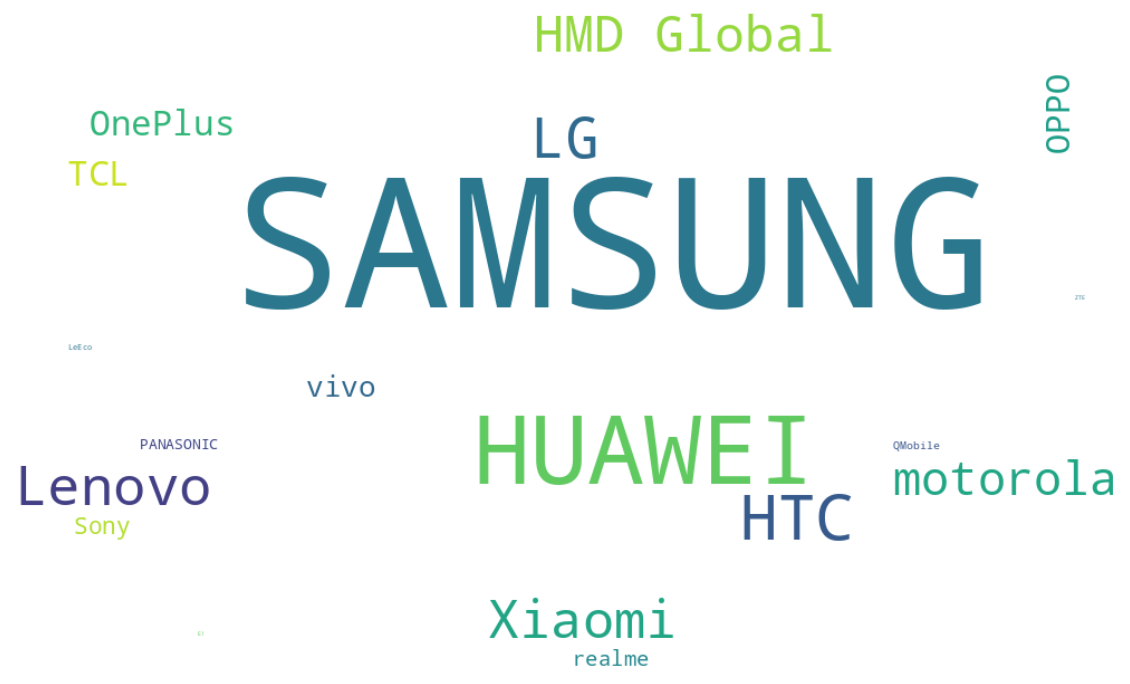

In [14]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

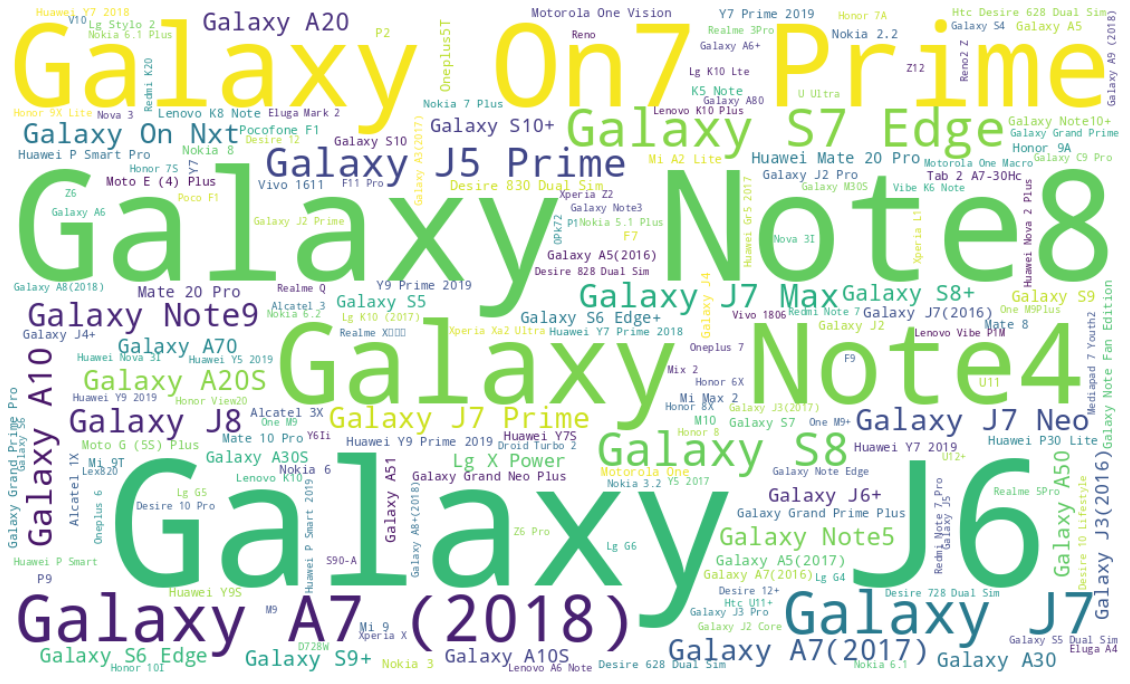

In [15]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted to the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [16]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [17]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     object             
 4   RadioNetworkGeneration  object             
 5   RadioOperatorName       object             
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  object             
 8   DeviceManufacturer      object             
 9   DeviceName              object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 207.9+ MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [18]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [19]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [20]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 2147483647]

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-01 21:09:29.386000+00:00,24.540540,46.784737,Mobile,4G,Operator C,2147483647,Enabled,HTC,D728W
1,2019-11-01 21:09:29.386000+00:00,24.540540,46.784737,Mobile,4G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
2,2019-11-01 21:10:45.323000+00:00,24.540540,46.784737,Mobile,3G,Operator C,2147483647,Enabled,HTC,D728W
3,2019-11-01 21:10:45.323000+00:00,24.540540,46.784737,Mobile,3G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
4,2019-11-01 21:11:26.822000+00:00,24.540540,46.784737,Mobile,4G,Operator C,2147483647,Enabled,HTC,D728W
...,...,...,...,...,...,...,...,...,...,...
2724318,2019-11-02 15:59:42+00:00,24.723953,46.669780,Mobile,4G,Operator C,2147483647,Enabled,SAMSUNG,Galaxy On Nxt
2725269,2019-11-03 08:35:23.171000+00:00,24.812200,46.752940,Mobile,3G,Operator A,2147483647,Enabled,SAMSUNG,Galaxy A20S
2725270,2019-11-03 08:35:32.550000+00:00,24.812200,46.752940,Mobile,4G,Operator A,2147483647,Enabled,SAMSUNG,Galaxy A20S
2725316,2019-11-03 13:50:06.017000+00:00,24.812235,46.752796,Mobile,3G,Operator A,2147483647,Enabled,SAMSUNG,Galaxy A20S


***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

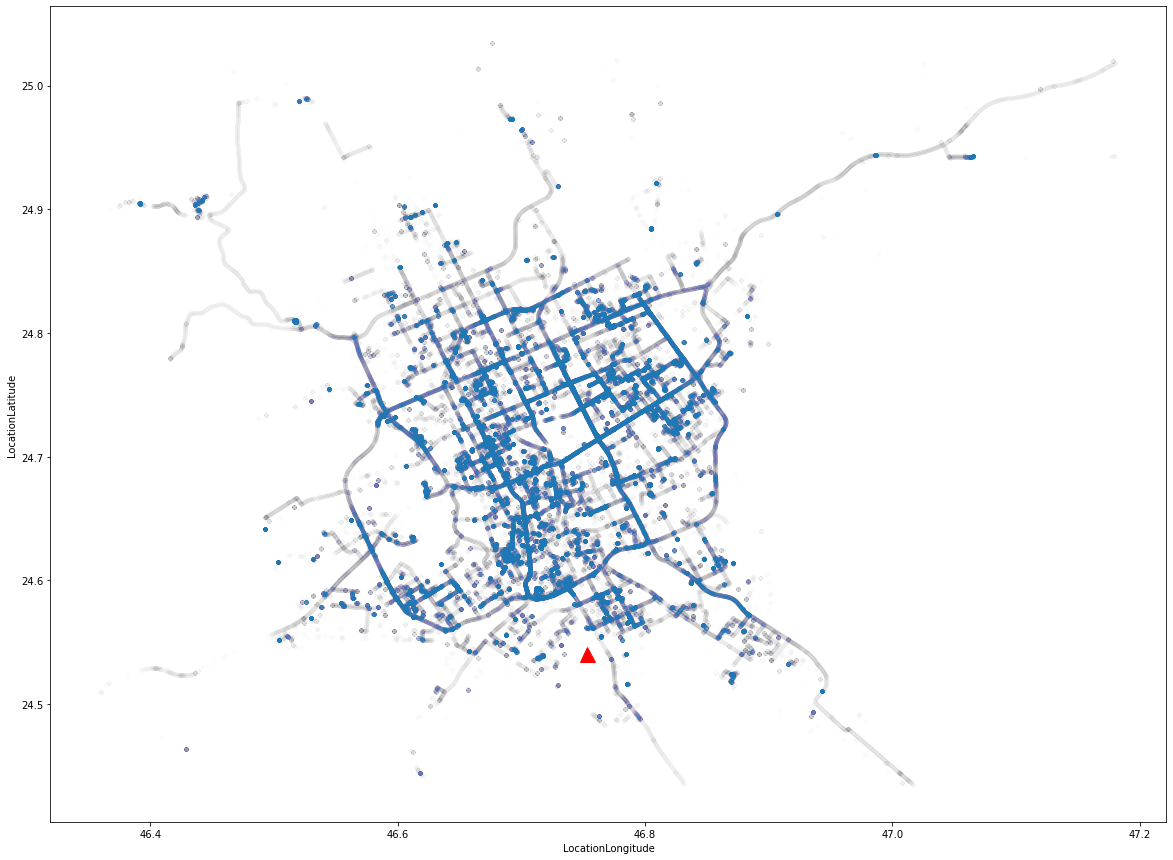

In [21]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

In [22]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
RSRP_data_valid.sample(40)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
1121195,2019-11-03 08:22:07.041000+00:00,24.802029,46.738920,Mobile,4G,Operator A,-107,Enabled,SAMSUNG,Galaxy Note8
1684912,2019-11-03 09:58:33.999000+00:00,24.683723,46.696930,Mobile,4G,Operator A,-90,Enabled,SAMSUNG,Galaxy S7 Edge
552007,2019-11-02 12:24:30+00:00,24.638746,46.589085,Mobile,4G,Operator C,-77,Enabled,SAMSUNG,Galaxy J6
1894183,2019-11-04 05:07:43.092000+00:00,24.596610,46.680610,Mobile,4G,Operator A,-107,Enabled,SAMSUNG,Galaxy Note8
1897803,2019-11-04 09:12:45.068000+00:00,24.744123,46.704300,Mobile,4G,Operator A,-107,Enabled,SAMSUNG,Galaxy Note8
784693,2019-11-02 22:18:03.058000+00:00,24.596565,46.680477,Mobile,4G,Operator A,-71,Enabled,SAMSUNG,Galaxy Note8
2114147,2019-11-03 17:44:01+00:00,24.579514,46.557236,Mobile,4G,Operator A,-84,Enabled,SAMSUNG,Galaxy J5 Prime
1694054,2019-11-03 20:08:46.999000+00:00,24.853510,46.601620,Mobile,4G,Operator A,-103,Enabled,SAMSUNG,Galaxy S7 Edge
2017248,2019-11-03 17:21:16.090000+00:00,24.547200,46.695004,Mobile,4G,Operator B,-67,Enabled,SAMSUNG,Galaxy S8
1076963,2019-11-02 20:54:03+00:00,24.838840,46.784275,Mobile,4G,Operator C,-85,Enabled,SAMSUNG,Galaxy J6


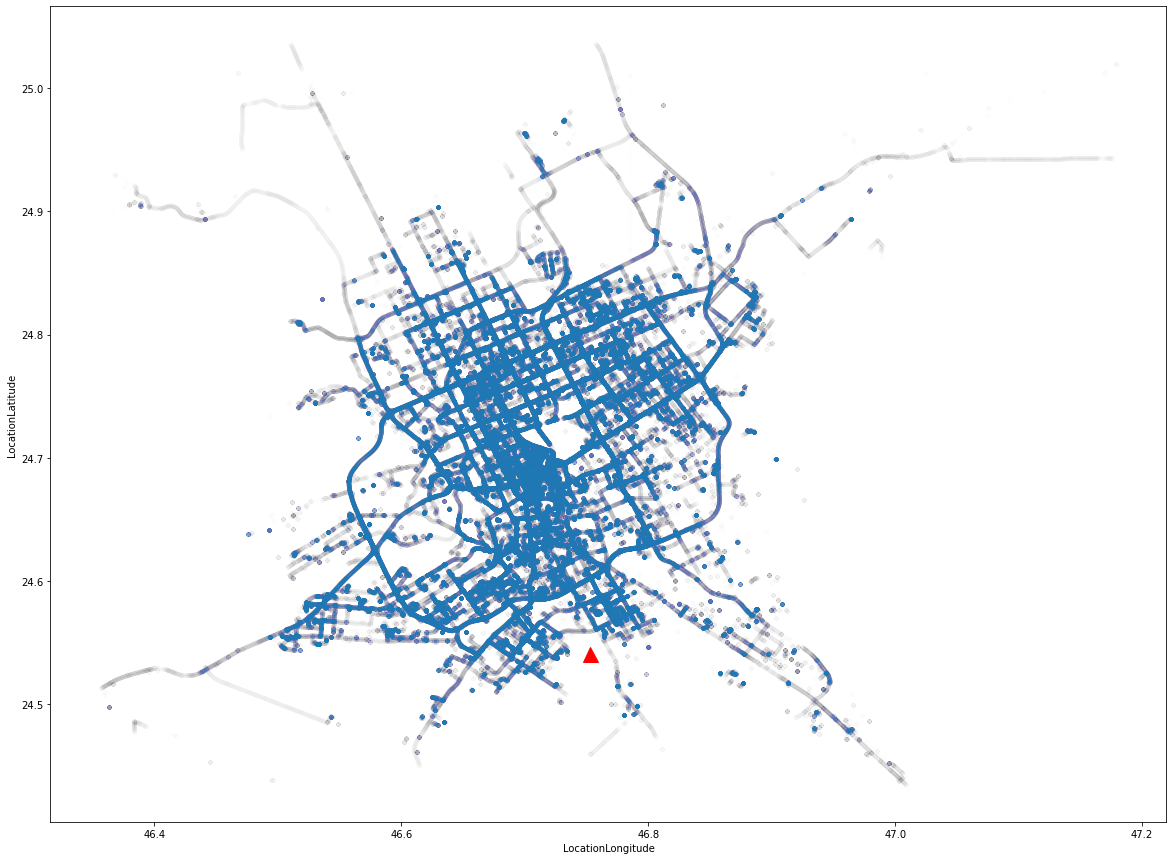

In [23]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [24]:
RSRP_data_invalid.sample(20)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
615773,2019-11-02 13:04:32.001000+00:00,24.754510,46.675890,Mobile,4G,Operator C,2147483647,Enabled,SAMSUNG,Galaxy J7 Max
1881596,2019-11-04 09:08:08+00:00,24.656204,46.678486,Mobile,3G,Operator B,2147483647,Enabled,SAMSUNG,Galaxy A70
2415210,2019-11-04 13:59:34.025000+00:00,24.784351,46.827170,Mobile,3G,Operator B,2147483647,Enabled,SAMSUNG,Galaxy A7 (2018)
1777840,2019-11-04 19:11:09.999000+00:00,24.740982,46.750565,Mobile,4G,Operator C,2147483647,Enabled,SAMSUNG,Galaxy S10+
1090992,2019-11-02 19:12:30.045000+00:00,24.537561,46.712975,Mobile,3G,Operator C,2147483647,Enabled,SAMSUNG,Galaxy S6 Edge+
1143043,2019-11-03 07:10:19.025000+00:00,24.813763,46.667090,Mobile,3G,Operator B,2147483647,Enabled,SAMSUNG,Galaxy S8
2586875,2019-11-04 06:06:30+00:00,24.616827,46.696766,Mobile,3G,Operator A,2147483647,Enabled,SAMSUNG,Galaxy J6
1520060,2019-11-03 17:26:16+00:00,24.590595,46.740295,Mobile,3G,Operator A,2147483647,Enabled,SAMSUNG,Galaxy J6
255976,2019-11-02 08:41:23+00:00,24.716345,46.614895,Mobile,3G,Operator C,2147483647,Enabled,SAMSUNG,Galaxy J2
124549,2019-11-02 16:02:47.340000+00:00,24.633808,46.758130,Mobile,4G,Operator A,2147483647,Enabled,SAMSUNG,Galaxy On7 Prime


In [25]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
ZTE                6
LAVA               6
SHARP              5
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [26]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [27]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
300044,2019-11-02 14:30:27.024000+00:00,24.630745,46.718807,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
2711163,2019-11-03 13:59:45.036000+00:00,24.664421,46.732720,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
141868,2019-11-02 11:27:55.026000+00:00,24.828440,46.591515,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
300038,2019-11-02 14:30:18.041000+00:00,24.630970,46.719128,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
2711162,2019-11-03 13:59:44.029000+00:00,24.664460,46.732660,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
300028,2019-11-02 11:35:30.027000+00:00,24.826975,46.565105,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
10021,2019-11-02 11:34:34.103000+00:00,24.826883,46.564724,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
2711732,2019-11-03 13:58:43.027000+00:00,24.669014,46.729248,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
141792,2019-11-02 11:24:40.037000+00:00,24.825980,46.610992,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii
9899,2019-11-02 11:27:30.042000+00:00,24.826859,46.592346,Mobile,4G,Operator A,0,Enabled,HUAWEI,Y6Ii


Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [28]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    1009
Name: DeviceName, dtype: int64

In [29]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    429
Name: DeviceName, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI    455
Name: DeviceManufacturer, dtype: int64

We can see that this an issue onlt happening with HUAWEI devices and especially the model Y6li

In [31]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
P20Pro                   1
P20 Pro                  1
Z6 Pro                   1
Z6                       1
Redmi Note 8 Pro         1
Name: DeviceName, Length: 255, dtype: int64

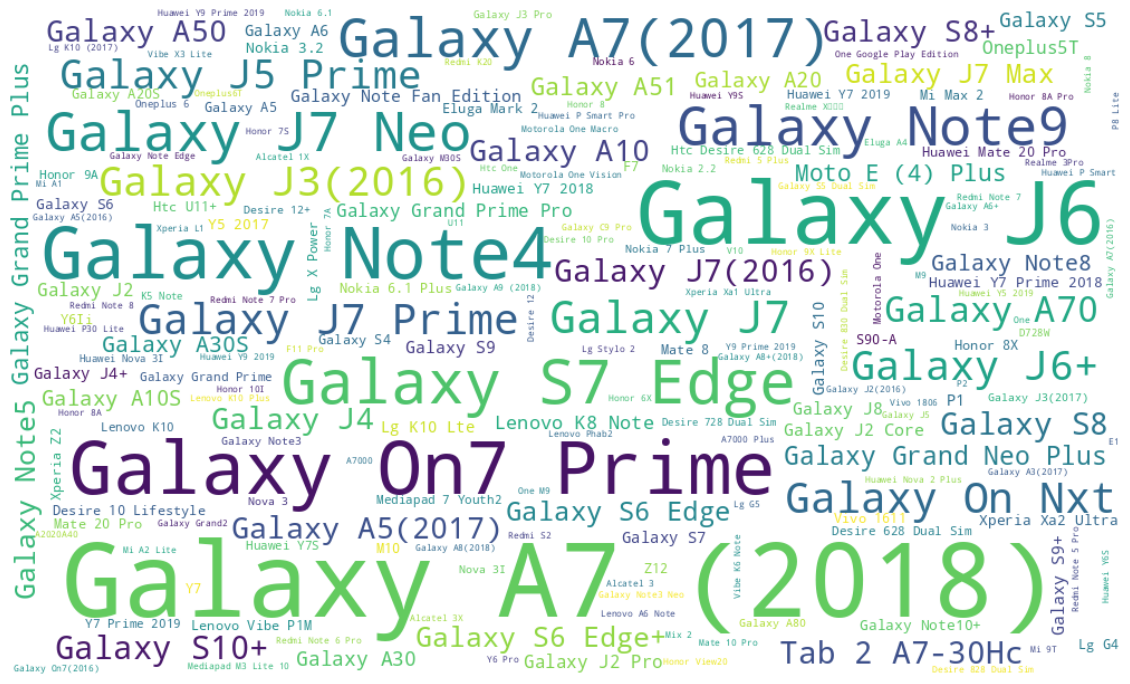

In [32]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Plotting:
We should plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [33]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data_time_sorted = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data_time_sorted.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-01 18:15:32.097000+00:00,24.639421,46.73017,Mobile,4G,Operator B,-110,Enabled,SAMSUNG,Galaxy S7 Edge
1,2019-11-01 18:15:32.505000+00:00,24.639421,46.73017,Mobile,4G,Operator B,-106,Enabled,SAMSUNG,Galaxy S7 Edge
2,2019-11-01 18:15:50.376000+00:00,24.639421,46.73017,Mobile,4G,Operator B,-93,Enabled,SAMSUNG,Galaxy S7 Edge
3,2019-11-01 18:20:11.389000+00:00,24.639421,46.73017,Mobile,4G,Operator B,-107,Enabled,SAMSUNG,Galaxy S7 Edge
4,2019-11-01 18:20:12.035000+00:00,24.639421,46.73017,Mobile,4G,Operator B,-111,Enabled,SAMSUNG,Galaxy S7 Edge
5,2019-11-01 18:20:13.264000+00:00,24.639421,46.73017,Mobile,4G,Operator B,-106,Enabled,SAMSUNG,Galaxy S7 Edge
6,2019-11-01 18:20:16.996000+00:00,24.639421,46.73017,Mobile,3G,Operator B,2147483647,Enabled,SAMSUNG,Galaxy S7 Edge
7,2019-11-01 18:21:45.695000+00:00,24.639421,46.73017,Mobile,3G,Operator B,2147483647,Enabled,SAMSUNG,Galaxy S7 Edge
8,2019-11-01 18:22:37.206000+00:00,24.639421,46.73017,Mobile,4G,Operator B,-98,Enabled,SAMSUNG,Galaxy S7 Edge
9,2019-11-01 18:36:43.521000+00:00,24.626589,46.68925,Mobile,4G,Operator C,-95,Enabled,SAMSUNG,Galaxy Grand Prime Plus


In [34]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [42]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data_houred, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# shaded = hv.operation.datashader.datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * shaded

# plot = RSRP_data_houred.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"])
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist",  width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight
    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

BokehModel(combine_events=True, render_bundle={'docs_json': {'ae750de0-2c3a-47f3-8016-6d91b9d2581e': {'defs': …

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [43]:
points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri * rastered * highlight 

BokehModel(combine_events=True, render_bundle={'docs_json': {'29a1a8bf-26a7-4cf6-8f8a-9c35bff44015': {'defs': …

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [37]:
print(RSRP_data_time_sorted.shape)

(2725353, 10)


In [38]:
RSRP_data_time_sorted.drop_duplicates(inplace=True)

In [39]:
print(RSRP_data_time_sorted.shape)

(2723541, 10)


In [40]:
cols = [
       "RadioConnectionType",
       "RadioNetworkGeneration",
       "RadioOperatorName",
       "RadioMobileDataEnabled",
       "DeviceManufacturer",
       "DeviceName"
      ]
RSRP_data_time_sorted[cols] = RSRP_data_time_sorted[cols].astype('category')

RSRP_data_time_sorted dataframe is now more ready for ML algorithms

In [41]:
RSRP_data_time_sorted.to_parquet("./Data/RSRP_data_processed.parq")